<a href="https://colab.research.google.com/github/FLCarvalho/TechChallenge_fase2/blob/main/TechChallenge_bovespa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **1. Definição do tech challenge**

**Problema**: Você foi recentemente alocado em uma equipe de cientistas de dados de um grande fundo de investimentos brasileiro. Sua missão inicial é desenvolver um modelo preditivo capaz de prever se o índice IBOVESPA vai fechar em alta ou baixa no dia seguinte, com base em dados históricos do próprio índice. Esse modelo será usado como insumo para alimentar dashboards internos de tomada de decisão dos analistas quantitativos da empresa.

**Objetivo**: Criar um modelo que preveja se o fechamento do IBOVESPA do dia seguinte será maior ou menor que o do dia atual, ou seja: Seu modelo deve prever a tendência (↑ ou ↓) com acuracidade mínima de 75% em um conjunto de teste. O conjunto de testes deverá conter o último mês (30 dias) de dados disponíveis.

### **2. Importação de bibliotecas e base de dados**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/FLCarvalho/TechChallenge_fase2/refs/heads/main/Dados%20Hist%C3%B3ricos%20-%20Ibovespa.csv')

Informações da base de dados:

* Data - Data da negociação.
* Último - Fechamento do índice no dia (em pontos).
* Abertura - Valor do índice na abertura do pregão (em pontos).
* Máxima - Maior valor do índice durante o dia (em pontos).
* Mínima- Menor valor do índice durante o dia (em pontos).
* Vol. - Volume de negociações (quantidade de ações ponderadas, em geral).
* Var% - Variação percentual do índice em relação ao fechamento do dia anterior.

In [ ]:
df.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,16.10.2025,142.200,142.604,143.191,141.446,"7,39M","-0,28%"
1,15.10.2025,142.604,141.683,142.905,141.154,"10,32B","0,65%"
2,14.10.2025,141.683,141.788,142.589,141.334,"7,12B","-0,07%"
3,13.10.2025,141.783,140.682,142.303,140.682,"5,53B","0,78%"
4,10.10.2025,140.680,141.725,142.274,140.231,"8,28B","-0,73%"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Data      502 non-null    object 
 1   Último    502 non-null    float64
 2   Abertura  502 non-null    float64
 3   Máxima    502 non-null    float64
 4   Mínima    502 non-null    float64
 5   Vol.      502 non-null    object 
 6   Var%      502 non-null    object 
dtypes: float64(4), object(3)
memory usage: 27.6+ KB


In [ ]:
df['Data'] = pd.to_datetime(df['Data'])  #Garantindo que a informação está no formato de data
df = df.set_index('Data')     # Definindo data como o indice

/tmp/ipython-input-3756142610.py:1: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Data'] = pd.to_datetime(df['Data'])  #Garantindo que a informação está no formato de data


In [ ]:
df.head()

,Último,Abertura,Máxima,Mínima,Vol.,Var%
Data,,,,,,
2025-10-16,142.200,142.604,143.191,141.446,"7,39M","-0,28%"
2025-10-15,142.604,141.683,142.905,141.154,"10,32B","0,65%"
2025-10-14,141.683,141.788,142.589,141.334,"7,12B","-0,07%"
2025-10-13,141.783,140.682,142.303,140.682,"5,53B","0,78%"
2025-10-10,140.680,141.725,142.274,140.231,"8,28B","-0,73%"


In [ ]:
df = df.sort_index()   # Arrumando os dados em ordem cronologica

In [ ]:
df.head()              # Verificação da cronologia no head e no tail da base de dados

,Último,Abertura,Máxima,Mínima,Vol.,Var%
Data,,,,,,
2023-10-16,116.534,115.760,116.905,115.760,"8,99M","0,67%"
2023-10-17,115.908,116.526,116.917,115.564,"10,37M","-0,54%"
2023-10-18,114.060,115.907,115.907,113.952,"15,49M","-1,60%"
2023-10-19,114.004,114.059,115.063,113.768,"11,50M","-0,05%"
2023-10-20,113.155,113.996,114.090,112.533,"11,74M","-0,74%"


In [ ]:
df.tail()               # Verificação da cronologia no head e no tail da base de dados

,Último,Abertura,Máxima,Mínima,Vol.,Var%
Data,,,,,,
2025-10-10,140.680,141.725,142.274,140.231,"8,28B","-0,73%"
2025-10-13,141.783,140.682,142.303,140.682,"5,53B","0,78%"
2025-10-14,141.683,141.788,142.589,141.334,"7,12B","-0,07%"
2025-10-15,142.604,141.683,142.905,141.154,"10,32B","0,65%"
2025-10-16,142.200,142.604,143.191,141.446,"7,39M","-0,28%"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 502 entries, 2023-10-16 to 2025-10-16
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Último    502 non-null    float64
 1   Abertura  502 non-null    float64
 2   Máxima    502 non-null    float64
 3   Mínima    502 non-null    float64
 4   Vol.      502 non-null    object 
 5   Var%      502 non-null    object 
dtypes: float64(4), object(2)
memory usage: 27.5+ KB


### **3. Análise Exploratória dos Dados Temporais**

### 3.1 Visualização dos dados

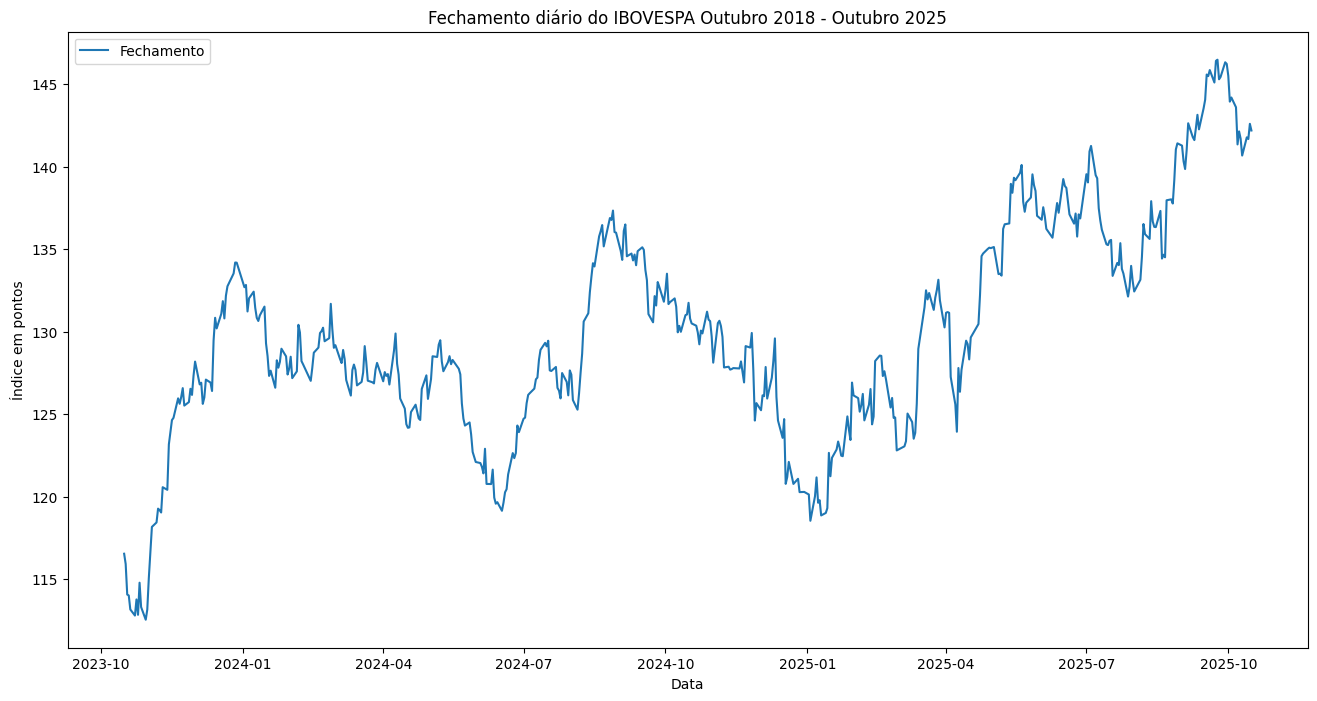

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(df.index, df['Último'], label='Fechamento')
plt.title('Fechamento diário do IBOVESPA Outubro 2018 - Outubro 2025')
plt.xlabel('Data')
plt.ylabel('Índice em pontos')
plt.legend()
plt.show()

3.2 Decomposição da Série Temporal

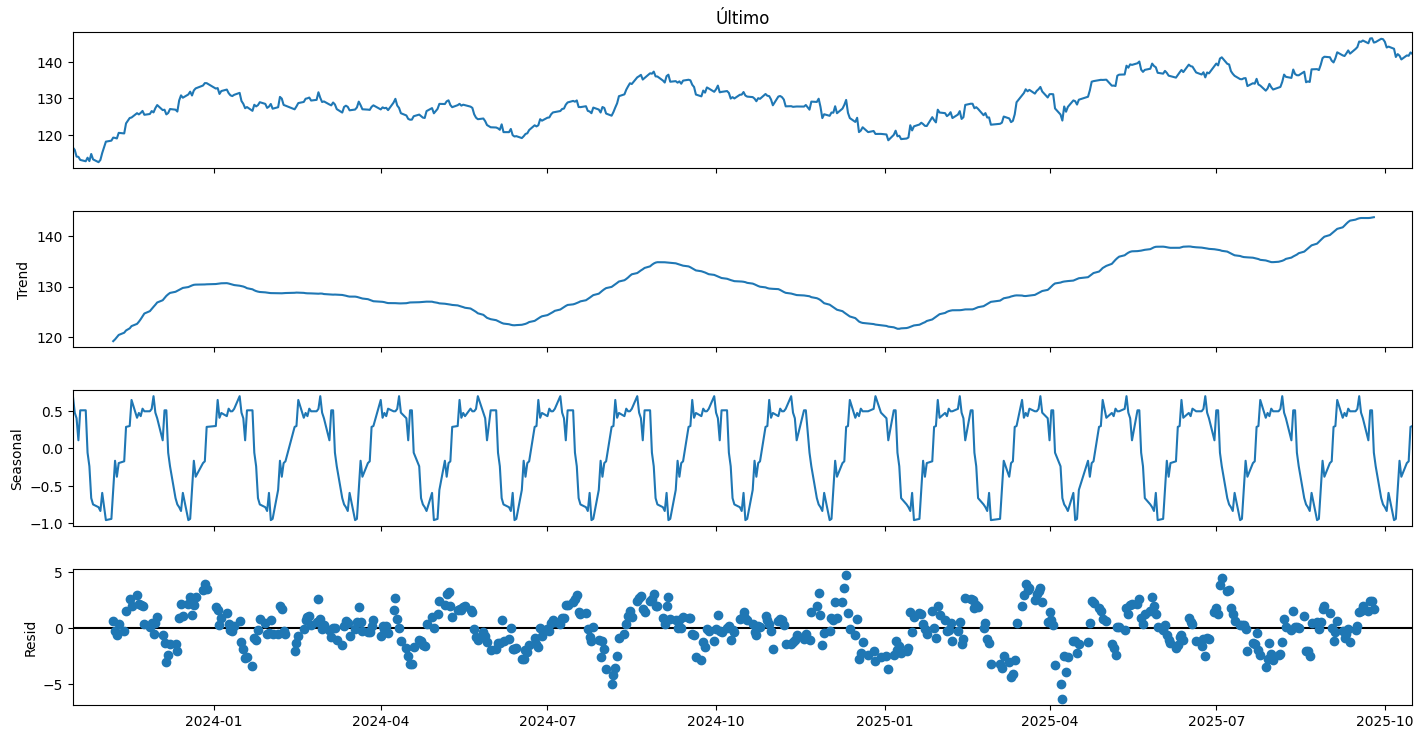

In [ ]:
resultado = seasonal_decompose(df['Último'], period=30)

ax = resultado.plot()
ax.get_figure().set_size_inches(16, 8)
plt.show()